In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
%gui asyncio

import sensors_ui.loader as loader
import sensors_ui.simple_ui as ui
import datetime
import matplotlib
import pandas as pd
from dateutil import tz
from account import *
matplotlib.rc('font', family='Monospace') 
matplotlib.rcParams.update({'figure.max_open_warning': 0})


In [4]:
%autoreload 2
#START_TIME =  "2022-09-14T00:00:00+02:00"
#TIME_RANGE = datetime.timedelta(hours=10)
#start =datetime.datetime.fromisoformat(START_TIME)

TIME_RANGE = datetime.timedelta(minutes=10)
start = datetime.datetime.now().replace(tzinfo=tz.tzlocal()) - TIME_RANGE


df = await loader.nats_stream_fetch( SERVER, NATS_CREDS, STREAM_NAME, EXPORT_SUBJECT_SENSORS, start, start + TIME_RANGE)
print("loaded %d rows" % df.shape[0])
ui.SensorsUi(df)

loaded 6 rows


SensorsUi(children=(Map(center=[49.44, 11.06], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoo…

In [2]:
df = pd.read_pickle("data/sensors-20220914T000000-20220914T100000.df")
#df = df[(df.trigger_time > "2022-09-07T08:28:46.742170+02:00") & (df.trigger_time < "2022-09-07T14:28:46.742170+02:00")]
ui.SensorsUi(df)

SensorsUi(children=(Map(center=[49.44, 11.06], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoo…

In [42]:

d

nats_rx_time                           2022-09-14 08:12:04.061832
seq                                                         39202
trigger_time                     2022-09-14 08:12:03.483661+02:00
sensor_data            sensor0   sensor1   sensor2   sensor3
0...
bogie_id                                                        1
invalid                                                     False
lat                                                     49.421005
lon                                                     10.973915
alt                                                       323.403
speed                                                       10.46
Name: 0, dtype: object

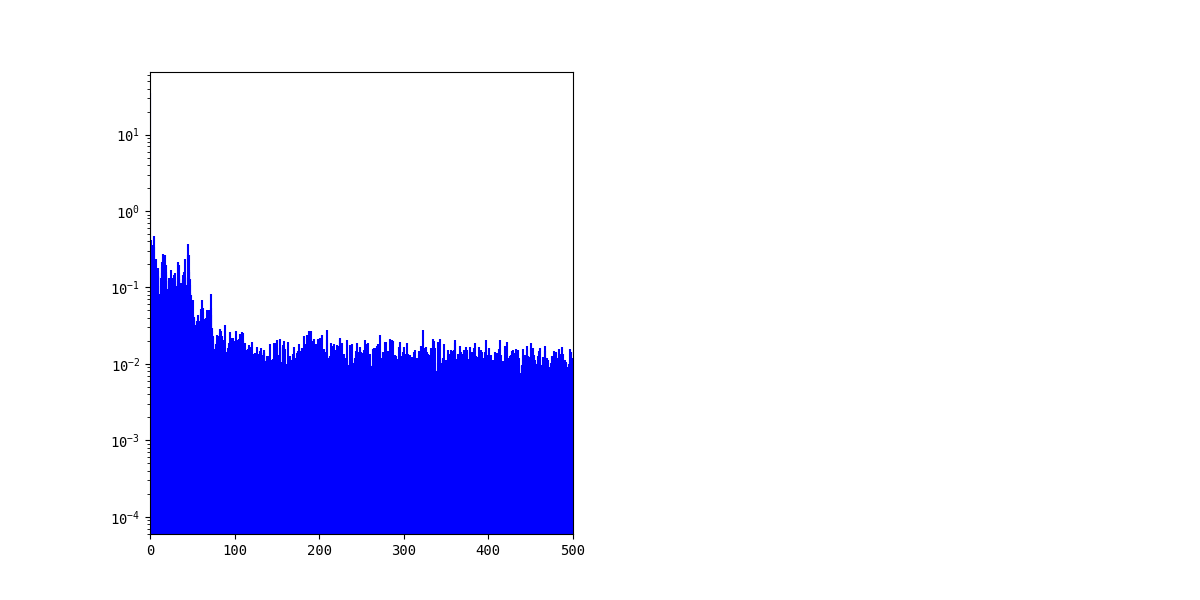

In [97]:
from numpy.fft import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
d = df.iloc[19]
sr = 1000
freq = 10
ts = 1.0/sr
x = d.sensor_data.sensor2
x = x.to_numpy()
x -= 0.6
#t = np.arange(0, 1, ts)
#x = 3*np.sin(2*np.pi*freq*t)
f = fft(x)
N = len(f)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.yscale("log")
plt.xlim(0,sr/2)
plt.stem(freq, np.abs(f), linefmt='b', \
         markerfmt=" ", basefmt="-b")
plt.show()

In [92]:
x

array([0.6040625 , 0.6040625 , 0.60374999, ..., 0.60281253, 0.60312498,
       0.60312498])

In [73]:
len(x)

0

In [64]:
N

1000

In [67]:
t

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,